In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
full_data_w = [] #white wine data
full_data_r = [] #red whine data

def Pulldataw(file):               #Pulling white wine data
    data_file = open(file, 'r')
    lines = data_file.readlines()
    for k in lines:
        stuff = np.array(k.split(';')) 
        full_data_w.append([stuff])    
    data_file.close()
Pulldataw('winequality-white.csv')

def Pulldatar(file):                #Pulling red wine data
    data_file = open(file, 'r')
    lines = data_file.readlines()
    for k in lines:
        stuff = np.array(k.split(';')) 
        full_data_r.append([stuff])    
    data_file.close()
Pulldatar('winequality-red.csv')

#print(full_data_r)
#print(full_data_w)

In [3]:
#splitting data into train,validate and test data (60,20,20)%
WLabels = full_data_w[0]
del full_data_w[0]
RLabels = full_data_r[0]
del full_data_r[0]

WTrain = full_data_w[:round(len(full_data_w)*0.6)]
WValid = full_data_w[round(len(full_data_w)*0.6):round(len(full_data_w)*0.8)]
WTest  = full_data_w[round(len(full_data_w)*0.8):]

RTrain = full_data_r[:round(len(full_data_r)*0.6)]
RValid = full_data_r[round(len(full_data_r)*0.6):round(len(full_data_r)*0.8)]
RTest  = full_data_r[round(len(full_data_r)*0.8):]


print(len(WTrain))
print(len(WValid))
print(len(WTest))
print()
print(len(RTrain))
print(len(RValid))
print(len(RTest))

2939
979
980

959
320
320


In [4]:
#Creating Design matrix : (DM) From Train Data


DMW = np.ones((len(WTrain),len(WTrain[0][0])+1))
DMR = np.ones((len(RTrain),len(RTrain[0][0])+1))


print(DMW.shape)
print(DMR.shape)

def CreateDM(DMtemp):  #Function to create Design Matrix
    for j in range(DMtemp.shape[0]):
        for k in range(DMtemp.shape[1]-1):
            DMtemp[j][k+1] = WTrain[j][0][k].rstrip()
    return(DMtemp)   
        
DMW = CreateDM(DMW) #Realocation of each designmatrix from ones to data
DMR = CreateDM(DMR) #Realocation of each designmatrix from ones to data





#Creating Design Matrix for validation Data
DMWValid = np.ones((len(WValid),len(WValid[0][0])+1))
DMRValid = np.ones((len(RValid),len(RValid[0][0])+1))


print(DMWValid.shape)
print(DMRValid.shape)

def CreateDM(DMtemp):  #Function to create Design Matrix
    for j in range(DMtemp.shape[0]):
        for k in range(DMtemp.shape[1]-1):
            DMtemp[j][k+1] = WValid[j][0][k].rstrip()
    return(DMtemp)   
        
DMWValid = CreateDM(DMWValid) #Realocation of each designmatrix from ones to data
DMRValid = CreateDM(DMRValid) #Realocation of each designmatrix from ones to data


  


#Create design matrix for Testing Data
DMWTest = np.ones((len(WTest),len(WTest[0][0])+1))
DMRTest = np.ones((len(RTest),len(RTest[0][0])+1))


print(DMWTest.shape)
print(DMRTest.shape)

def CreateDM(DMtemp):  #Function to create Design Matrix
    for j in range(DMtemp.shape[0]):
        for k in range(DMtemp.shape[1]-1):
            DMtemp[j][k+1] = WTest[j][0][k].rstrip()
    return(DMtemp)   
        
DMWTest = CreateDM(DMWTest) #Realocation of each designmatrix from ones to data
DMRTest = CreateDM(DMRTest) #Realocation of each designmatrix from ones to data

 

(2939, 13)
(959, 13)
(979, 13)
(320, 13)
(980, 13)
(320, 13)


In [5]:
def hFunction(DM,theta_values):
    return 1/(1+np.exp(-np.dot(DM,theta_values)))#H(x,Theta) Calculation

def GradientDescent(theta_values,theta_valuesOld,DM,alpha):#Gradient Descent Function
    while np.sqrt(np.sum(np.power(theta_values - theta_valuesOld, 2))) > 0.0005: # while euclidean norm > 0.0005 (so ϵ = 0.0005) 
        theta_valuesOld = theta_values # set old parameter values to parameter values before they are updated
        for i in range(DM.shape[0]):
            theta_values = theta_values - alpha*( (hFunction(DM[i,:12], theta_values) - DM[i][12]) * DM[i,:12] ) # update the parameters using the update rule

             
            
    return theta_values #return our theta values for this model

def convertMatrix(value,DM):  #Function to convert our design matrix for oneVsrest multiclass classification
    trueIndices=np.where(DM[:,12]==value) #finds indices where target variable value is positive
    falseIndices=np.where(DM[:,12]!=value) #finds indices where target variable value is negative
    DM[trueIndices,12]=1 #sets positive values to 1
    DM[falseIndices,12]=0 #sets negative values to 0
    return DM

In [6]:
convertedDMR=convertMatrix(5,DMR)#create a converted design matrix where target variable only has two values 1 and 0 (1 represents the value you use as a parameter and 0 represents every other value besides the parameter value)
print(convertedDMR)
theta_values=np.random.uniform(size=12)#initialize our initial thetas
theta_valuesOld=np.zeros(12)
alpha=1e-4#learning rate
theta_values=GradientDescent(theta_values,theta_valuesOld,convertedDMR,alpha)
print(theta_values)#print our theta values for the model

[[ 1.    7.    0.27 ...  0.45  8.8   0.  ]
 [ 1.    6.3   0.3  ...  0.49  9.5   0.  ]
 [ 1.    8.1   0.28 ...  0.44 10.1   0.  ]
 ...
 [ 1.    7.5   0.32 ...  0.38  9.5   1.  ]
 [ 1.    6.6   0.23 ...  0.54 10.2   0.  ]
 [ 1.    6.6   0.2  ...  0.54 10.2   0.  ]]
[ 1.86044039 -0.01701475  3.67794035  0.25320185  0.07989998  0.11912269
 -0.01357239  0.01300425  1.99901502  0.493202   -2.21659533 -0.69538154]


In [27]:
#print(DMR[0])
#DMRTest = DMRTest[DMRTest[:,1].argsort()] 
value=hFunction(DMRTest[:,:12],theta_values)#our predictions for a data point in terms of probability
#print(value)

(320, 13)
(320,)


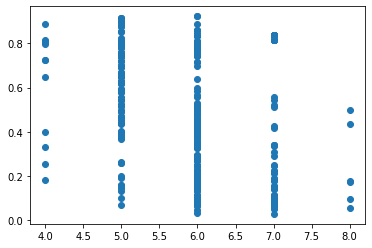

In [25]:
#loop for each possible quility /10

ThetaList = []
alpha=1e-4#learning rate
valuelist = []

for k in rande(11):
    convertedDMR=convertMatrix(k,DMR)
    theta_values=np.random.uniform(size=12)#initialize our initial thetas
    theta_valuesOld=np.zeros(12)
    theta_values=GradientDescent(theta_values,theta_valuesOld,convertedDMR,alpha)
    ThetaList.append(theta_values)

#loop for h functions
for t in ThetaList:
    val = hFunction(DMRTest[:,:12],theta_values)
    valuelist.append(val)

# 